# An Introduction to the ``gcol`` Library

In this section, we demonstrate the functionality of the ``gcol`` library's routines using both textual and graphical output. If you have not done so already, the ``gcol`` library should first be installed by typing the following at the command line: ``python pip install gcol``, and then restarting the kernal. 

Let us first review of some basic terminology in graph theory.

* A [graph](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics)) is an object comprising a set of nodes that are linked by edges. They can visualized in diagram form, as shown below. Graphs are sometimes known as *networks*; nodes are sometimes called *vertices*.
* A [node coloring](https://en.wikipedia.org/wiki/Graph_coloring) of a graph is an assignment of colors to nodes so that all pairs of adjacent nodes have different colors. The aim is to use as few colors as possible. The smallest number of colors needed to color the nodes of a graph $G$ is known as the graph's chromatic number, denoted by $\chi(G)$.
* An [edge coloring](https://en.wikipedia.org/wiki/Edge_coloring) of a graph is an assignment of colors to edges so that all pairs of adjacent edges have different colors (a pair of edges is considered adjacent if and only if they share a common endpoint). The aim is to use as few colors as possible. The smallest number of colors needed for coloring the edges of a graph $G$ is known as the graph's chromatic index, denoted by $\chi'(G)$. According to Vizing's theorem, $\chi'(G)$ is either $\Delta(G)$ or $\Delta(G) + 1$, where $\Delta(G)$ is the maximum degree in $G$.
* In the [node precoloring](https://en.wikipedia.org/wiki/Precoloring_extension) problem, some of the nodes have already been assigned colors. The aim is to allocate colors to the remaining nodes so that we get a full coloring that uses a minimum number of colors. The same concepts apply for the edge precoloring problem. 

Note that all the above problems are NP-hard.

## Getting Started

In this first example, we start by importing the libraries we need. The ``networkx`` library is used to generate and visualize the graphs, the ``matplotlib.pyplot`` is used to render the drawings, and the ``gcol`` library contains all of our graph coloring routines. 

Having imported the relevant libraries, the following code generates a [dodecahedron graph](https://en.wikipedia.org/wiki/Regular_dodecahedron) and draws it to the screen.

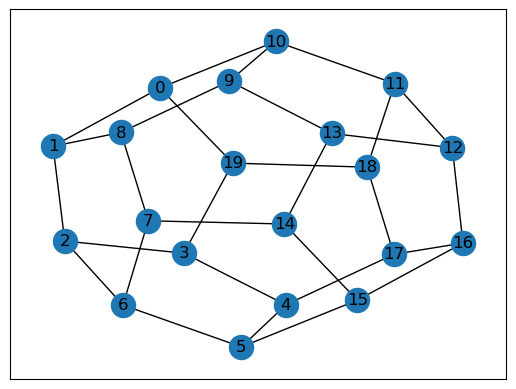

In [1]:
import networkx as nx              # popular python library for the graph theory
import matplotlib.pyplot as plt    # popular library for visualization  
import gcol                        # the gcol library

G = nx.dodecahedral_graph()
nx.draw_networkx(G, pos=nx.spring_layout(G, seed=1))
plt.show()

Now that we have defined a graph, we can easily color it using ``gcol``'s routines. The example below shows how to use the ``gcol.node_coloring()`` routine to color the nodes of ``G``. Some information about this coloring is then written to the screen, along with a visualization. The colors of the nodes are held in the dictionary ``c``, using the integers ``0,1,2,...`` as color labels. We can also write the coloring as a partition, which groups all nodes of the same color. Note that adjacent nodes are always painted with different colors, as required.

Here is a node coloring of the above graph:
{0: 0, 1: 1, 19: 1, 10: 1, 2: 0, 3: 2, 8: 0, 9: 2, 18: 0, 11: 2, 6: 1, 7: 2, 4: 0, 5: 2, 13: 0, 12: 1, 14: 1, 15: 0, 16: 2, 17: 1}
The number of colors in this solution is: 3
Here is the same solution, expressed as a partition of the nodes:
[[0, 2, 4, 8, 13, 15, 18], [1, 6, 10, 12, 14, 17, 19], [3, 5, 7, 9, 11, 16]]
Here is a picture of this coloring:


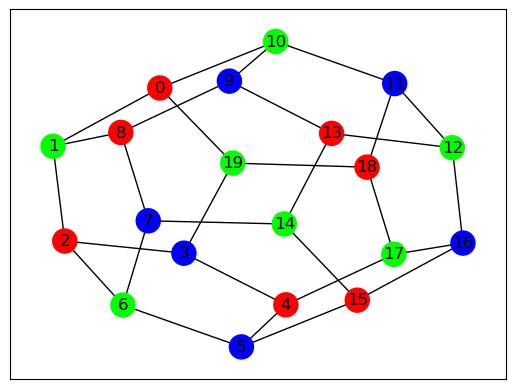

In [2]:
c = gcol.node_coloring(G)

print("Here is a node coloring of the above graph:")
print(c)
print("The number of colors in this solution is:", max(c.values()) + 1)

print("Here is the same solution, expressed as a partition of the nodes:")
print(gcol.partition(c))

print("Here is a picture of this coloring:")
nx.draw_networkx(G, 
                 pos=nx.spring_layout(G, seed=1), 
                 node_color=gcol.get_node_colors(G, c))
plt.show()

We can also write similar commands to determine the [chromatic number](https://en.wikipedia.org/wiki/Graph_coloring) and [chromatic index](https://en.wikipedia.org/wiki/Edge_coloring) of this graph.

In [3]:
print("The chromatic number of this graph is:", gcol.chromatic_number(G))
print("The chromatic index of this graph is:", gcol.chromatic_index(G))

The chromatic number of this graph is: 3
The chromatic index of this graph is: 3


## Node Coloring and Visualization

The previous example shows a node 3-coloring of the 20-node dodecahedron graph. The positions of the nodes in the visualization have been determined using the ``nx.spring_layout()`` routine from ``networkx``; however, we can also choose to position the nodes based on their colors. 

The first example below uses the routine ``gcol.coloring_layout()`` in combination with ``nx.draw_networkx()`` to position the nodes in a ring so that those of the same color are next to each other. Similarly, the second example uses the routine ``gcol.multipartite_layout()`` to put nodes of the same color into columns. 

Note that, despite looking superficially different, the solutions shown are the same as the previous example.

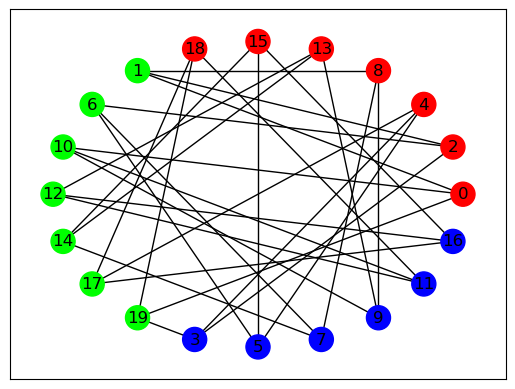

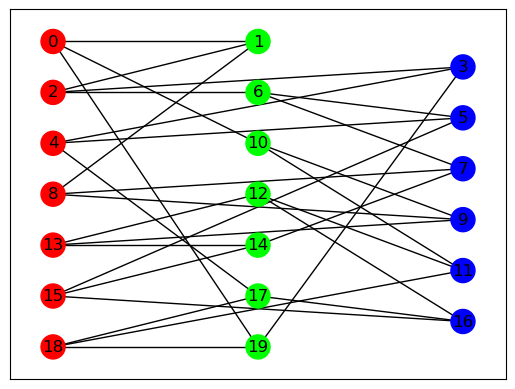

In [4]:
G = nx.dodecahedral_graph()
nx.draw_networkx(G, 
                 pos=gcol.coloring_layout(G, c), 
                 node_color=gcol.get_node_colors(G, c))
plt.show()

nx.draw_networkx(G, 
                 pos=gcol.multipartite_layout(G, c), 
                 node_color=gcol.get_node_colors(G, c))
plt.show()

We will now do something similar with a larger graph. In the following, the nodes of the graph ``G`` represent the different characters in the play Les Miserables. Edges between nodes then indicate pairs of characters that appear in the same scenes together. 

Number of colors = 10


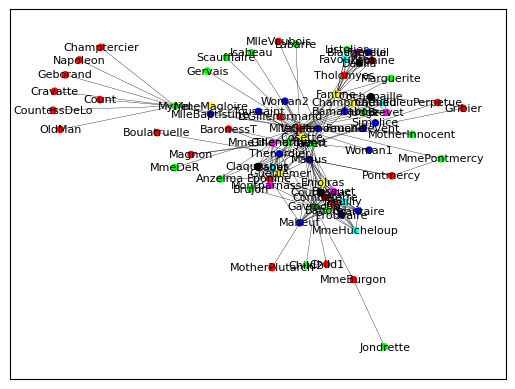

In [5]:
G = nx.les_miserables_graph()
c = gcol.node_coloring(G, opt_alg=1)

print("Number of colors =", max(c.values()) + 1)
nx.draw_networkx(G, 
                 pos=nx.spring_layout(G, seed=1), 
                 node_color=gcol.get_node_colors(G, c), 
                 node_size=20, 
                 font_size=8, 
                 width=0.25)
plt.show()

Note in the above that we have used the option ``opt_alg=1`` meaning that an exact algorithm has been used to produce the optimal solution. The output tells us that the nodes of ``G`` can be colored using a minimum of ten colors. In this case, it means that it is possible to partition the characters of Les Miserables into ten groups (but not fewer) so that the characters in each group never appear together. 

The visualization of the above graph appears rather cluttered, however, so we might choose to position the nodes according to color and remove the node's labels. This can be done using the following commands, which show the same solution.

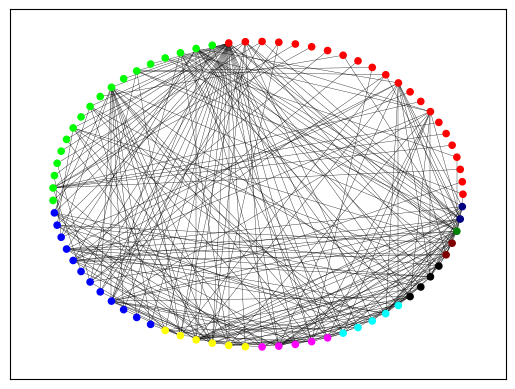

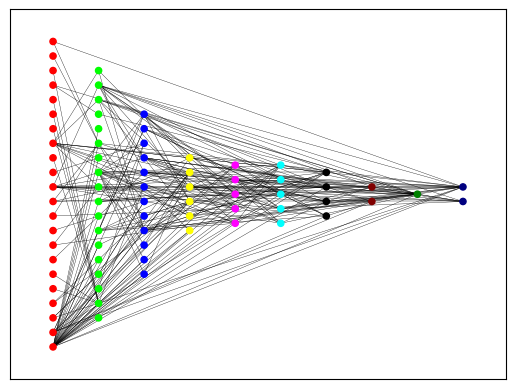

In [6]:
nx.draw_networkx(G, 
                 pos=gcol.coloring_layout(G, c), 
                 node_color=gcol.get_node_colors(G, c), 
                 node_size=20, 
                 with_labels=False, 
                 width=0.25)
plt.show()

nx.draw_networkx(G, 
                 pos=gcol.multipartite_layout(G, c), 
                 node_color=gcol.get_node_colors(G, c), 
                 node_size=20, 
                 with_labels=False, 
                 width=0.25)
plt.show()

The following code carries out a similar sequence of operations for a [random](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model) $G(n,p)$ graph. These graphs are generated at random by taking $n$ nodes and then adding an edge between each pair of nodes at random with probability $p$. In this case we use $n=100$ and $p=0.05$. We also make use of local search by setting ``opt_alg=2`` and ``it_limit=10000`` in the ``gcol.node_coloring()`` routine.

Number of colors = 4


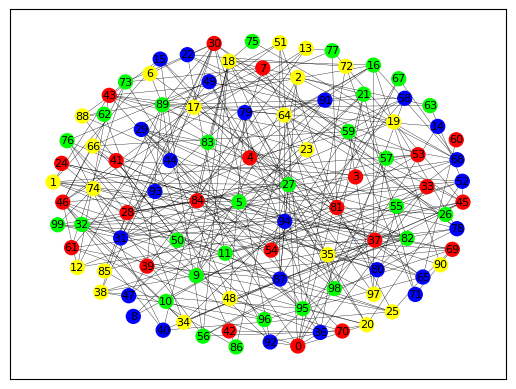

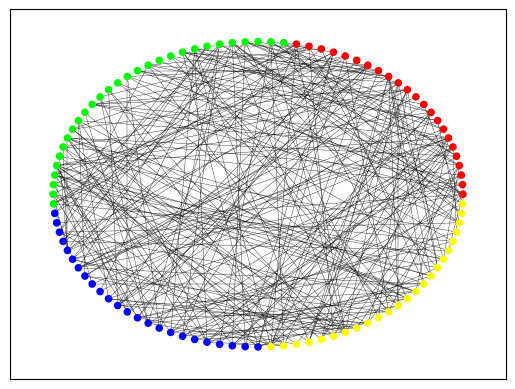

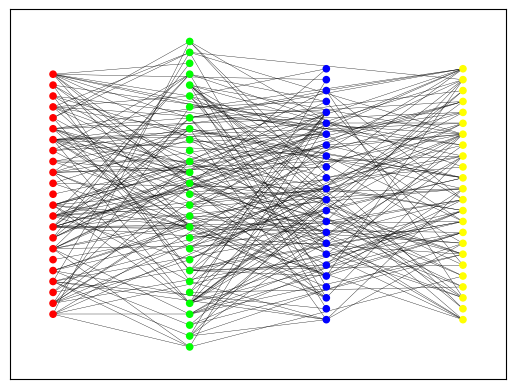

In [7]:
G = nx.gnp_random_graph(100, 0.05, seed=1)
c = gcol.node_coloring(G, strategy="random", opt_alg=2, it_limit=10000)

print("Number of colors =", max(c.values()) + 1)

nx.draw_networkx(G, 
                 pos=nx.arf_layout(G), 
                 node_color=gcol.get_node_colors(G, c), 
                 node_size=100, 
                 font_size=8, 
                 width=0.25)
plt.show()

nx.draw_networkx(G, 
                 pos=gcol.coloring_layout(G, c), 
                 node_color=gcol.get_node_colors(G, c), 
                 node_size=20, 
                 with_labels=False, 
                 width=0.25)
plt.show()

nx.draw_networkx(G, 
                 pos=gcol.multipartite_layout(G, c), 
                 node_color=gcol.get_node_colors(G, c), 
                 node_size=20, 
                 with_labels=False, 
                 width=0.25)
plt.show()

The final example in this section gives a bespoke routine for producing a dense [planar graph](https://en.wikipedia.org/wiki/Planar_graph). In the production of this graph, each node is given an $(x,y)$ coordinate in the unit square. These coordinates are then used when drawing the graph. In the following code, we generate a 1000-node graph and color it using local search.

Note that the nodes of all planar graphs can be colored using at most four colors. This is due to the famous 
[Four Color Theorem](https://en.wikipedia.org/wiki/Four_color_theorem).

Number of colors = 4


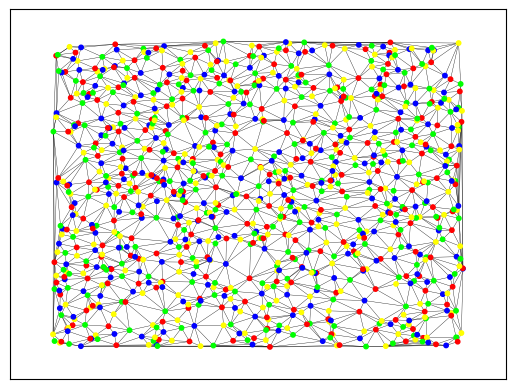

In [8]:
def make_planar_graph(n, seed=None):
    #Function for making a dense planar graph by placing nodes randomly into the unit square    
    import random
    from scipy.spatial import Delaunay
    random.seed(seed)
    P = [(random.random(), random.random()) for i in range(n)]
    T = Delaunay(P).simplices.copy()
    G = nx.Graph()
    for v in range(n):
        G.add_node(v, pos=(P[v][0], P[v][1]))
    for x, y, z in T:
        G.add_edges_from([(x, y), (x, z), (y, z)])
    return G

G = make_planar_graph(1000, seed=1)
c = gcol.node_coloring(G, opt_alg=2, it_limit=10000)
print("Number of colors =", max(c.values()) + 1)
nx.draw_networkx(G, 
                 pos=nx.get_node_attributes(G, "pos"), 
                 with_labels=False, 
                 node_size=10, 
                 node_color=gcol.get_node_colors(G, c), 
                 width=0.25)
plt.show()

## Edge Coloring and Visualization

The following example shows how we can use the ``gcol`` library to color the edges of a graph. As we have discussed, in edge coloring the maximum degree $\Delta(G)$ in the graph $G$ gives a lower bound on the chromatic index $\chi'(G)$. Since $\Delta(G)=3$ and an edge-3-coloring has been determined, we can conclude that this is an optimal solution.

Here is the color of each edge:
{(11, 12): 0, (11, 18): 1, (10, 11): 2, (12, 16): 1, (12, 13): 2, (18, 19): 0, (17, 18): 2, (16, 17): 0, (4, 17): 1, (15, 16): 2, (0, 10): 0, (9, 10): 1, (9, 13): 0, (8, 9): 2, (13, 14): 1, (14, 15): 0, (5, 15): 1, (7, 14): 2, (0, 19): 1, (3, 19): 2, (0, 1): 2, (3, 4): 0, (2, 3): 1, (1, 2): 0, (2, 6): 2, (5, 6): 0, (4, 5): 2, (1, 8): 1, (6, 7): 1, (7, 8): 0}
Here is the same solution, expressed as a partition of the edges:
[[(0, 10), (1, 2), (11, 12), (14, 15), (16, 17), (18, 19), (3, 4), (5, 6), (7, 8), (9, 13)], [(0, 19), (1, 8), (11, 18), (12, 16), (13, 14), (2, 3), (4, 17), (5, 15), (6, 7), (9, 10)], [(0, 1), (10, 11), (12, 13), (15, 16), (17, 18), (2, 6), (3, 19), (4, 5), (7, 14), (8, 9)]]
Maximum degree   = 3
Number of colors = 3


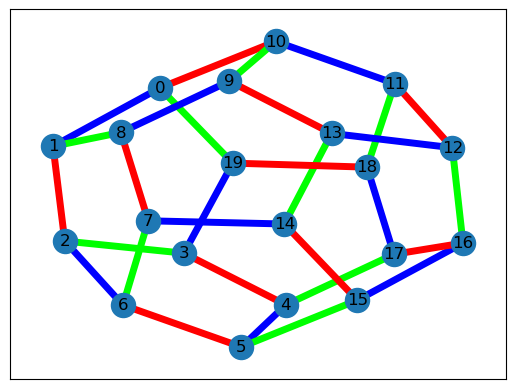

In [9]:
G = nx.dodecahedral_graph()
c = gcol.edge_coloring(G)
print("Here is the color of each edge:")
print(c)

print("Here is the same solution, expressed as a partition of the edges:")
print(gcol.partition(c))

print("Maximum degree   =", max(G.degree(v) for v in G))
print("Number of colors =", max(c.values()) + 1)

nx.draw_networkx(G, 
                 pos=nx.spring_layout(G, seed=1), 
                 edge_color=gcol.get_edge_colors(G, c), 
                 width=5)

Here is another example using a [complete graph](https://en.wikipedia.org/wiki/Complete_graph). Edge coloring in complete graphs has applications in [sports league scheduling](https://rhydlewis.eu/papers/sportsPaper.pdf).

Maximum degree   = 19
Number of colors = 19


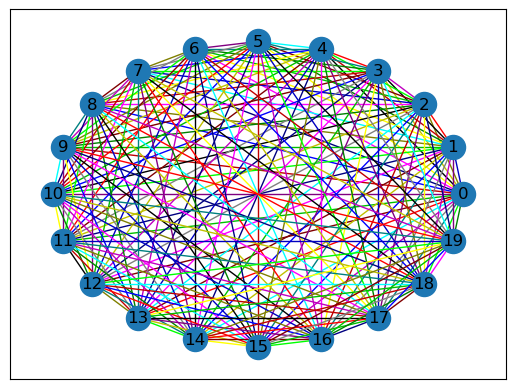

In [10]:
G = nx.complete_graph(20)
c = gcol.edge_coloring(G, opt_alg=1)
print("Maximum degree   =", max(G.degree(v) for v in G))
print("Number of colors =", max(c.values()) + 1)
nx.draw_networkx(G, 
                 pos=nx.circular_layout(G), 
                 edge_color=gcol.get_edge_colors(G, c))

Here is another example using the same 1000-node planar graph from earlier.

Maximum degree   = 11
Number of colors = 11


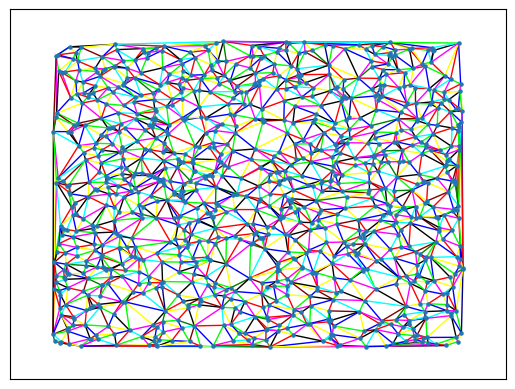

In [11]:
G = make_planar_graph(1000, seed=1)
c = gcol.edge_coloring(G, opt_alg=2, it_limit=1000)
print("Maximum degree   =", max(G.degree(v) for v in G))
print("Number of colors =", max(c.values()) + 1)
nx.draw_networkx(G, 
                 pos=nx.get_node_attributes(G, "pos"), 
                 with_labels=False, node_size=5, 
                 edge_color=gcol.get_edge_colors(G, c))

## Precoloring

As mentioned earlier, in the node precoloring problem some of the nodes have already been assigned colors. The aim is to assign colors to the remaining nodes so that we get a full coloring that uses a minimum number of colors. In the example below, the dictionary ``P`` is used to assign nodes 0, 1, 8, 9 and 10 to colors 0, 1, 2, 3, and 1, respectively. This partial coloring is then shown, together with a corresponding full coloring. 

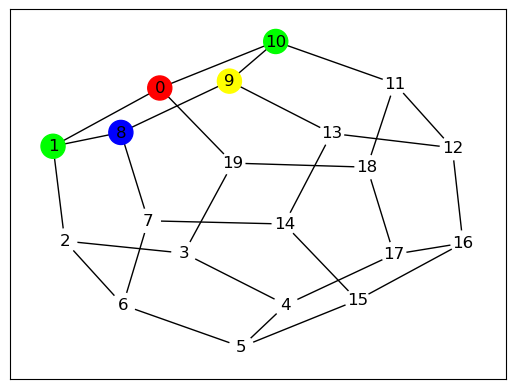

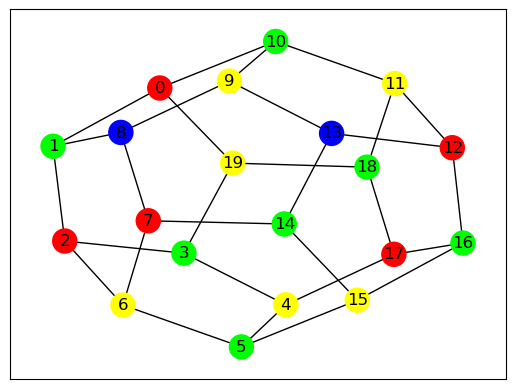

In [12]:
G = nx.dodecahedral_graph()
P = {0:0, 1:1, 8:2, 9:3, 10:1}
nx.draw_networkx(G, 
                 pos=nx.spring_layout(G, seed=1), 
                 node_color=gcol.get_node_colors(G, P))
plt.show()

c = gcol.node_precoloring(G, P, strategy="random", opt_alg=2, it_limit=100)
nx.draw_networkx(G, 
                 pos=nx.spring_layout(G, seed=1), 
                 node_color=gcol.get_node_colors(G, c))
plt.show()

A similar process can also be followed for edge precoloring, which the following demonstrates. Note that, when defining edges in the dictionary ``P`` the endpoints must be given in the order used by NetworkX. For example, in the example below, using ``(1,0):0`` in ``P`` instead of ``(0,1):0`` will raise a ``ValueError``. 

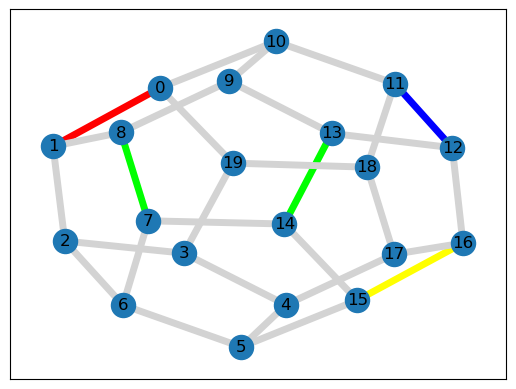

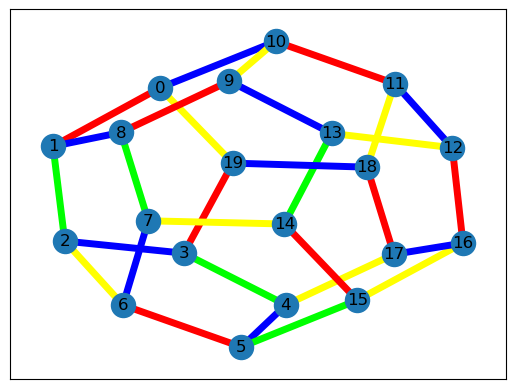

In [13]:
G = nx.dodecahedral_graph()
P = {(0, 1): 0, (7, 8): 1, (13, 14): 1, (11, 12): 2, (15, 16): 3}
nx.draw_networkx(G, 
                 pos=nx.spring_layout(G, seed=1), 
                 edge_color=gcol.get_edge_colors(G, P), 
                 width=5)
plt.show()

c = gcol.edge_precoloring(G, P, strategy="random", opt_alg=2, it_limit=100)
nx.draw_networkx(G, 
                 pos=nx.spring_layout(G, seed=1), 
                 edge_color=gcol.get_edge_colors(G, c), 
                 width=5)
plt.show()

Node precoloring can also be used to solve [sudoku puzzles](https://en.wikipedia.org/wiki/Sudoku). The objective in sudoku is to fill a $d^2 \times d^2$ grid with digits so that each column, each row, and each of the $d \times d$ boxes contains all of the digits from $0$ to $d^2-1$. The puzzle comes with some of the cells filled. The player then needs to fill the remaining cells while satisfying the above constraints. Here is an example puzzle using $d=3$ and the digits $0,1,\ldots,8$. Blank cells are marked by dots.

$$
\begin{pmatrix}
. & . & . & . & 5 & . & . & . & . \\ 
. & . & 8 & . & 1 & . & . & . & . \\
. & . & . & . & . & . & . & 1 & 2 \\ 
. & 7 & . & . & . & 2 & . & . & . \\ 
. & . & . & 6 & . & . & . & . & . \\ 
. & 4 & . & . & . & 0 & . & 3 & . \\ 
. & 5 & . & . & . & . & . & . & . \\ 
. & . & . & . & 2 & . & 6 & . & . \\ 
. & . & . & . & . & . & . & 2 & .
\end{pmatrix}
$$

Sudoku puzzles can be solved by first forming a [sudoku graph](https://en.wikipedia.org/wiki/Sudoku_graph), which uses a node for each cell in the grid. Edges in this graph occur between all pairs of nodes in the same column, row or box. Finally, we use the filled cells in the puzzle to precolor the correct nodes. The puzzle is then solved by coloring the remaining nodes using $d^2$ colors. The following code shows how to solve the above puzzle

Here is the sudoku puzzle from above


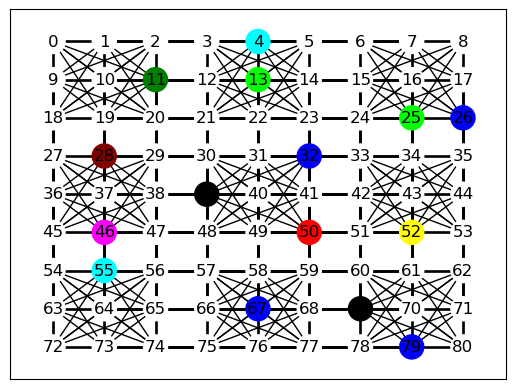

Here is its solution. Number of colors = 9


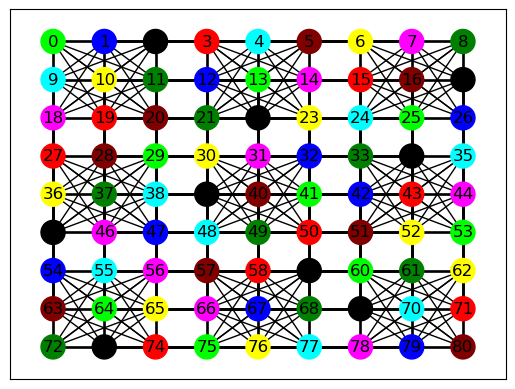

In [14]:
# Function for laying out the nodes of a (d**2 x d**2)-node sudoku puzzle 
def sudoku_layout(G, d):
    pos = {}
    u = 0
    for i in range(d**2):
        for j in range(d**2):
            pos[u]=(j,-i)
            u += 1
    return pos

G = nx.sudoku_graph(3)
P = {4:5, 11:8, 13:1, 25:1, 26:2, 28:7, 32:2, 39:6, 46:4, 50:0, 52:3, 55:5, 67:2, 69:6, 79:2}
print("Here is the sudoku puzzle from above")
nx.draw_networkx(G, 
                 pos=sudoku_layout(G, 3), 
                 node_color=gcol.get_node_colors(G, P))
plt.show()

c = gcol.node_precoloring(G, P, opt_alg=1)
print("Here is its solution. Number of colors =", max(c.values()) + 1)
nx.draw_networkx(G, 
                 pos=sudoku_layout(G, 3), 
                 node_color=gcol.get_node_colors(G, c))
plt.show()

## $k$-Coloring

The $k$-coloring problem is a version of the graph coloring problem where the desired number of colors $k$ is stated beforehand by the user. For node coloring, if $k<\chi(G)$, then no solution is possible; for edge coloring, if $k < \chi'(G)$, then no solution is possible. Several variants of the $k$-coloring problem can be formulated, including equitable coloring and weighted graph coloring, using both weighted and unweighted graphs. Examples are considered below.

In this first example, we make use of ``gcol.node_k_coloring()`` method to produce $k$-colorings of a random $G(1000,0.05)$ graph for $k=6$, $5$, and $4$. (For values of $k<4$, solutions are not possible and a ``ValueError`` will  be returned)

Here is a node 6-coloring of G, 


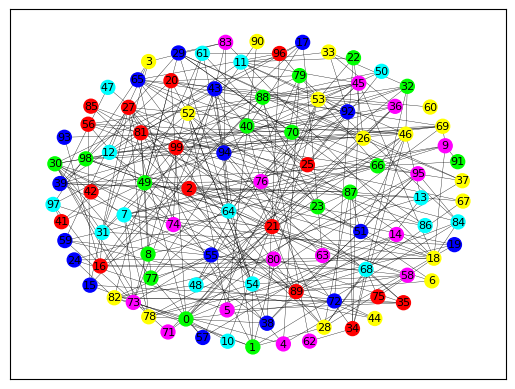

here is a node 5-coloring of G,


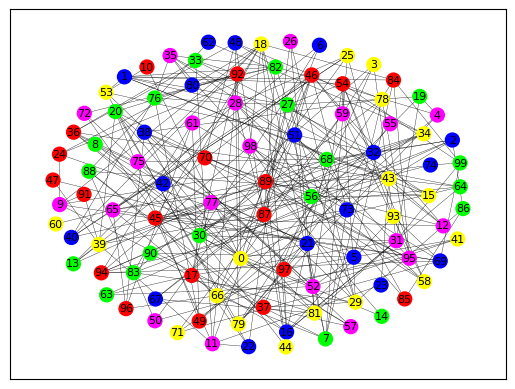

and here is a node 4-coloring of G.


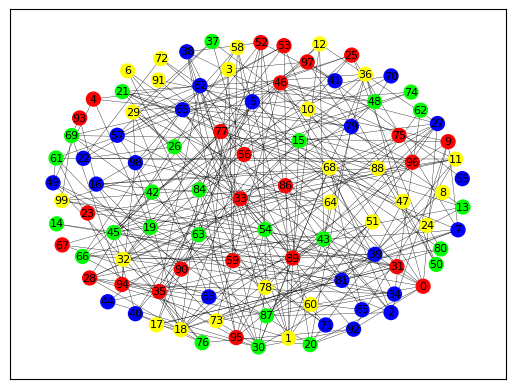

In [15]:
G = nx.gnp_random_graph(100, 0.05, seed=1)

print("Here is a node 6-coloring of G, ")
c = gcol.node_k_coloring(G, 6, opt_alg=2, it_limit=1000)
nx.draw_networkx(G, 
                 pos=nx.arf_layout(G), 
                 node_color=gcol.get_node_colors(G, c), 
                 node_size=100, 
                 font_size=8, 
                 width=0.25)
plt.show()

print("here is a node 5-coloring of G,")
c = gcol.node_k_coloring(G, 5, opt_alg=2, it_limit=1000)
nx.draw_networkx(G, 
                 pos=nx.arf_layout(G), 
                 node_color=gcol.get_node_colors(G, c), 
                 node_size=100, 
                 font_size=8, 
                 width=0.25)
plt.show()

print("and here is a node 4-coloring of G.")
c = gcol.node_k_coloring(G, 4, opt_alg=2, it_limit=1000)
nx.draw_networkx(G, 
                 pos=nx.arf_layout(G), 
                 node_color=gcol.get_node_colors(G, c), 
                 node_size=100, 
                 font_size=8, 
                 width=0.25)
plt.show()

The following shows a similar process for edge $k$-coloring.

Here is an edge 5-coloring of G,


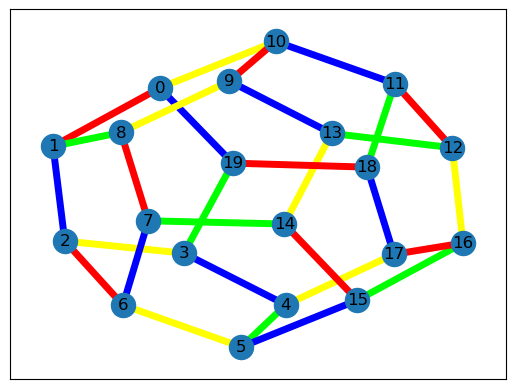

here is an edge 4-coloring of G,


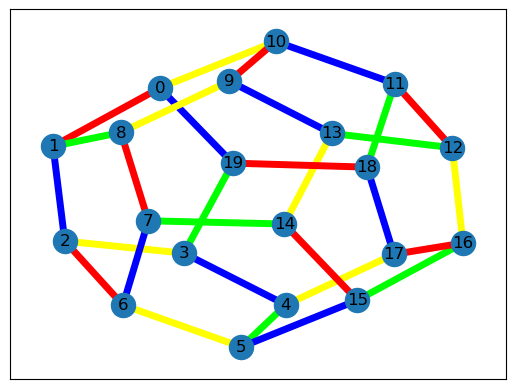

and here is an edge 3-coloring of G.


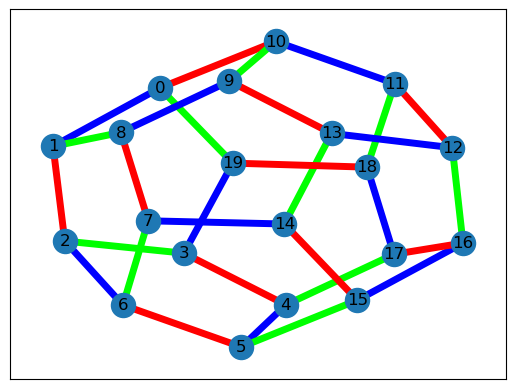

In [16]:
G = nx.dodecahedral_graph()

print("Here is an edge 5-coloring of G,")
c = gcol.edge_k_coloring(G, 4)
nx.draw_networkx(G, 
                 pos=nx.spring_layout(G, seed=1), 
                 edge_color=gcol.get_edge_colors(G, c), 
                 width=5)
plt.show()

print("here is an edge 4-coloring of G,")
c = gcol.edge_k_coloring(G, 4)
nx.draw_networkx(G, 
                 pos=nx.spring_layout(G, seed=1), 
                 edge_color=gcol.get_edge_colors(G, c), 
                 width=5)
plt.show()

print("and here is an edge 3-coloring of G.")
c = gcol.edge_k_coloring(G, 3)
nx.draw_networkx(G, 
                 pos=nx.spring_layout(G, seed=1), 
                 edge_color=gcol.get_edge_colors(G, c), 
                 width=5)
plt.show()

### Equitable $k$-coloring

In the equitable node $k$-coloring problem we are seeking an assignment of colors to nodes so that no two adjacent nodes have the same color, and
the number of nodes per-color is as uniform as possible. We can also choose to define positive weights on the nodes, in which case we are seeking a proper coloring in which the sum of the node weights in each color is as uniform as possible.

The following example determines an equitable node $5$-coloring for a random $G(100,0.05)$ graph.

Here is an equitable node-5-coloring of G,


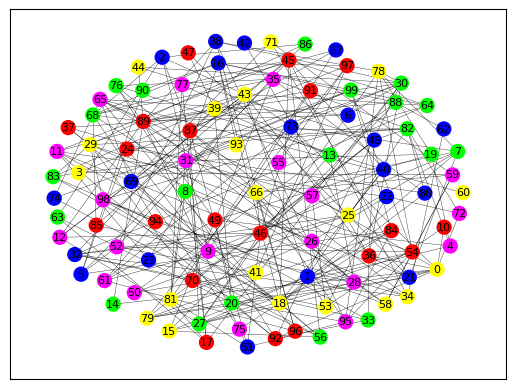

Largest color class has 20 nodes
Smallest color class has 20 nodes


In [17]:
G = nx.gnp_random_graph(100, 0.05, seed=1)

print("Here is an equitable node-5-coloring of G,")
c = gcol.equitable_node_k_coloring(G, 5, opt_alg=2, it_limit=1000)
nx.draw_networkx(G, 
                 pos=nx.arf_layout(G), 
                 node_color=gcol.get_node_colors(G, c), 
                 node_size=100, 
                 font_size=8, 
                 width=0.25)
plt.show()
P = gcol.partition(c)
print("Largest color class has", max(len(j) for j in P), "nodes")
print("Smallest color class has", min(len(j) for j in P), "nodes")

The following example also determines an equitable node $5$-coloring for a random $G(100,0.05)$ graph. However, in this case, all nodes have been assigned weights randomly chosen from the set $\{1,2,\ldots,10\}$. The figure displays the weight of each node and the text gives the total weight of each color class.

Here is an equitable node 5-coloring of the node-weighted graph G,


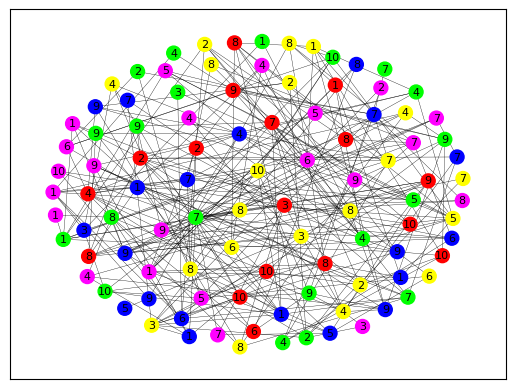

Weight of color class 0 = 115 [1, 2, 2, 3, 4, 6, 7, 8, 8, 8, 8, 9, 9, 10, 10, 10, 10]
Weight of color class 1 = 115 [1, 1, 2, 2, 3, 4, 4, 4, 4, 5, 7, 7, 7, 8, 9, 9, 9, 9, 10, 10]
Weight of color class 2 = 114 [1, 1, 1, 1, 3, 4, 5, 5, 6, 6, 7, 7, 7, 7, 8, 9, 9, 9, 9, 9]
Weight of color class 3 = 114 [1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 6, 6, 7, 7, 8, 8, 8, 8, 8, 8, 10]
Weight of color class 4 = 114 [1, 1, 1, 1, 2, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7, 7, 7, 8, 9, 9, 9, 10]


In [18]:
import random
random.seed(1)

H = nx.gnp_random_graph(100, 0.05, seed=1)
G = nx.Graph()
for u in H:
    G.add_node(u, weight=random.randint(1,10))
for u,v in H.edges():
    G.add_edge(u, v)

print("Here is an equitable node 5-coloring of the node-weighted graph G,")
c = gcol.equitable_node_k_coloring(G, 5, weight="weight", opt_alg=2, it_limit=1000)

labels = {u: G.nodes[u]['weight'] for u in G.nodes}
nx.draw_networkx(G,
                 pos=nx.arf_layout(G), 
                 node_color=gcol.get_node_colors(G, c), 
                 node_size=100, 
                 font_size=8, 
                 width=0.25, 
                 labels=labels)
plt.show()
P = gcol.partition(c)
for j in range(len(P)):
    Wj = sorted([G.nodes[v]["weight"] for v in P[j]])
    print("Weight of color class", j, "=", sum(Wj), Wj)

The same process can also be followed to produce equitable edge $k$-colorings, as the following demonstrates. This uses an edge-weighted graph as indicated.

Here is an equitable edge-3-coloring of the edge-weighted graph G,


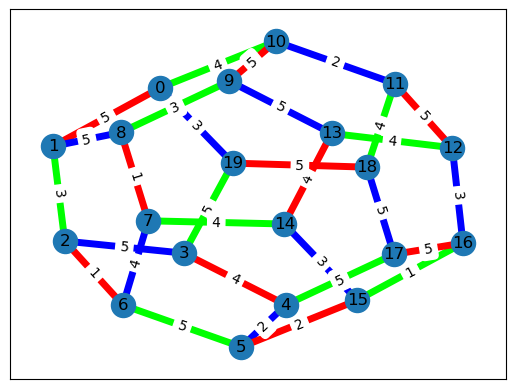

Weight of color class 0 = 37 [1, 1, 2, 4, 4, 5, 5, 5, 5, 5]
Weight of color class 1 = 38 [1, 3, 3, 4, 4, 4, 4, 5, 5, 5]
Weight of color class 2 = 37 [2, 2, 3, 3, 3, 4, 5, 5, 5, 5]


In [19]:
G = nx.dodecahedral_graph()
for u, v in G.edges():
    G.add_edge(u, v, edgeweight=random.randint(1,5))

print("Here is an equitable edge-3-coloring of the edge-weighted graph G,")
c = gcol.equitable_edge_k_coloring(G, 3, weight="edgeweight", opt_alg=2, it_limit=1000)

pos = nx.spring_layout(G, seed=1)
nx.draw_networkx(G, pos=pos, edge_color=gcol.get_edge_colors(G, c), width=5)
labels = nx.get_edge_attributes(G,'edgeweight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)
plt.show()

P = gcol.partition(c)
for j in range(len(P)):
    Wj = sorted([G.edges[e]["edgeweight"] for e in P[j]])
    print("Weight of color class", j, "=", sum(Wj), Wj)

### Minimum Cost $k$-Coloring

Sometimes we are seeking a node $k$-coloring but are willing to allow some nodes to remain uncolored. This is particularly useful when using a value for $k$ that is less than the graph's chromatic number $\chi(G)$. In such cases, we are seeking to minimize the number of uncolored nodes, while ensuring that adjacent colored nodes never have the same color. We might also choose to add positive weights to the nodes, in which case we will seek to minimize the sum of the weights of the uncolored nodes.

The following example creates a node-weighted random graph and then produces a node 3-coloring solution using the routine ``gcol.min_cost_k_coloring()``. This solution has five uncolored nodes with a total weight of six.

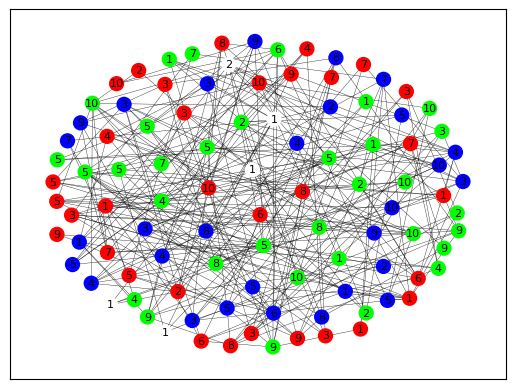

Uncolored nodes have weights [1, 1, 1, 1, 2] giving a total cost = 6


In [20]:
H = nx.gnp_random_graph(100, 0.05, seed=1)
G = nx.Graph()
for u in H:
    G.add_node(u, weight=random.randint(1,10))
for u,v in H.edges():
    G.add_edge(u, v)
labels = {u: G.nodes[u]['weight'] for u in G} 

c = gcol.min_cost_k_coloring(G, 3, weight="weight", weights_at="nodes", it_limit=1000)
nx.draw_networkx(G, 
                 pos=nx.arf_layout(G), 
                 node_color=gcol.get_node_colors(G, c), 
                 node_size=100, 
                 font_size=8, 
                 width=0.25, 
                 labels=labels)
plt.show()

U = list(G.nodes[u]["weight"] for u in c if c[u] <= -1)
print("Uncolored nodes have weights", sorted(U), "giving a total cost =", sum(U))

In a similar fashion, we may prefer a solution in which all nodes are assigned to colors, but are willing to allow some clashes in a solution (a clash occurs when the endpoints of an edge have the same color). The aim is to now $k$-color all nodes while minimizing the number of clashes. Again, we might also choose to add positive weights to the edges, in which case we will seek to minimize the sum of the weights of the clashing edges.

The following example creates a small edge-weighted graph and then produces a node 2-coloring using the routine ``gcol.min_cost_k_coloring()``. Six of the edges are causing a clash, giving a total weight of 12.

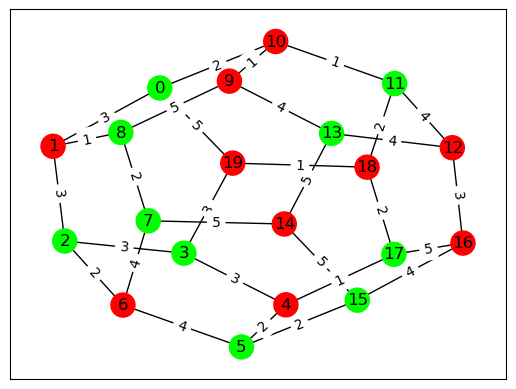

The following edges are causing clashes [(2, 3), (5, 15), (7, 8), (9, 10), (12, 16), (18, 19)] giving a total cost of 12


In [21]:
G = nx.dodecahedral_graph()
for u, v in G.edges():
    G.add_edge(u, v, edgeweight=random.randint(1,5))

c = gcol.min_cost_k_coloring(G, 2, weight="edgeweight", weights_at="edges", it_limit=1000)
pos = nx.spring_layout(G, seed=1)
nx.draw_networkx(G, pos=pos, node_color=gcol.get_node_colors(G, c))
labels = nx.get_edge_attributes(G,'edgeweight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)
plt.show()

C = list( (u,v) for (u, v) in G.edges() if c[u]==c[v])
print("The following edges are causing clashes", C, "giving a total cost of", sum(G[u][v]["edgeweight"] for (u, v) in C))

## Kempe Chains

Given a node coloring of a graph, a [Kempe chain](https://en.wikipedia.org/wiki/Kempe_chain) is a connected set of nodes that alternate in color. Equivalently, it is a maximal connected subgraph that contains nodes of at most two colors. Interchanging the colors of the nodes in a Kempe chain creates a new coloring that uses the same number of colors, or one fewer color.

The following example takes a coloring ``c`` of a graph ``G`` and determines a Kempe using node 18 (which is yellow) and color 1 (green). The resultant Kempe chain is therefore the connected component of yellow and green nodes that contains node 18. The nodes in this chain are stored in the set ``K``. A Kempe chain interchange is then performed, which swaps the colors of the nodes in ``K``, leading to the second solution below.

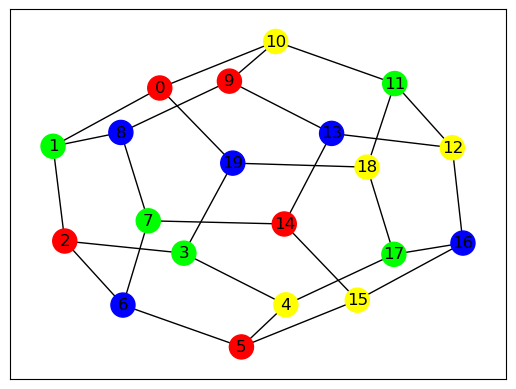

Kempe Chain built from node-18 and color 1 = {3, 4, 10, 11, 12, 17, 18}
Interchanging the colors of these nodes gives:


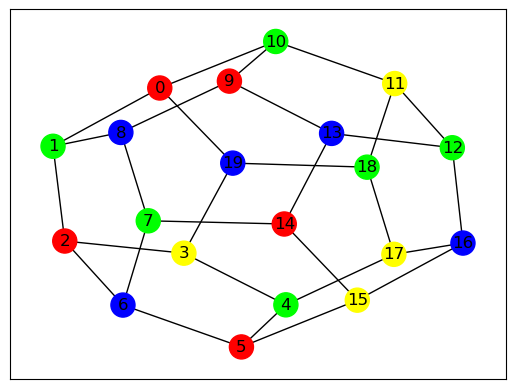

In [22]:
G = nx.dodecahedral_graph()
c = gcol.node_k_coloring(G, 4)
nx.draw_networkx(G, 
                 pos=nx.spring_layout(G, seed=1), 
                 node_color=gcol.get_node_colors(G, c))
plt.show()

K = gcol.kempe_chain(G, c, 18, 1)
print("Kempe Chain built from node-18 and color 1 =", K)

#do a Kempe chain interchange
col1 = c[18]
col2 = 1
for v in K:
    if c[v] == col1:
        c[v] = col2
    else:
        c[v] = col1

print("Interchanging the colors of these nodes gives:")
nx.draw_networkx(G, 
                 pos=nx.spring_layout(G, seed=1), 
                 node_color=gcol.get_node_colors(G, c))
plt.show()

## Independent Sets, Cliques and Coverings

In this final section we show how the algorithms of the ``gcol`` library can be used to find (possibly approximate) solutions to the following three NP-hard optimization problems. 

* The *maximum independent set problem* involves determining the largest subset of nodes in a graph $G$ such that none of the nodes in this set are neighboring. The size of the largest independent set in $G$ is known as the *independence number*, denoted by $\alpha(G)$.
* The *minimum node cover problem* involves determining the smallest subset of nodes in $G$ such that every edge in the graph has at least one endpoint from this set. 
* The *maximum clique problem* involves determining the largest subset of nodes in $G$ such that every pair of nodes in this set is adjacent. The size of the largest clique in a graph $G$ is known as the *clique number*, denoted by $\omega(G)$. 

We can also define weights on the nodes, if desired. If these cases the aims are to now maximize (or minimize) the sum of the weights of the selected nodes. 

The following example demonstrates how a large independent set of nodes can be determined in the Les Miserables graph using the ``gcol.max_independent_set()`` method.

In the set of 77 Les Miserables characters, there's a subset of 35 characters who never meet.


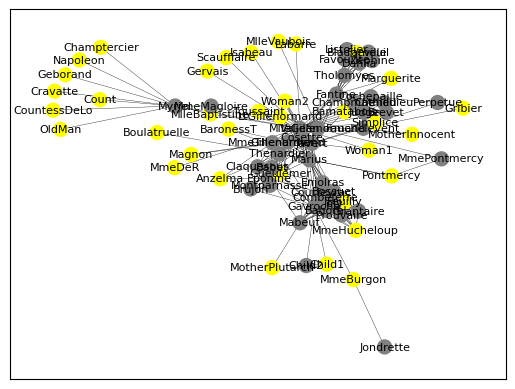

In [23]:
G = nx.les_miserables_graph()
S = gcol.max_independent_set(G, it_limit=10000)
print("In the set of", len(G), "Les Miserables characters, there's a subset of", len(S), "characters who never meet.")
nx.draw_networkx(G, 
                 nx.spring_layout(G, seed=1), 
                 node_color=gcol.get_set_colors(G, S), 
                 node_size=100, 
                 font_size=8, 
                 width=0.25)
plt.show()

In the above, the members of the independent set, whose size we have tried to maximize, are shown in yellow. The set of grey nodes, whose size has been minimized, gives us a node covering. Hence, we have determined solutions to both problems.

Large cliques can also be found by using the ``gcol.max_independent_set()`` routine on the graph's complement. A demonstration of this is shown below.

In the set of 77 Les Miserables characters, there's a subset of 10 characters who form a clique. These are ['Combeferre', 'Feuilly', 'Mabeuf', 'Bahorel', 'Joly', 'Courfeyrac', 'Bossuet', 'Enjolras', 'Marius', 'Gavroche']


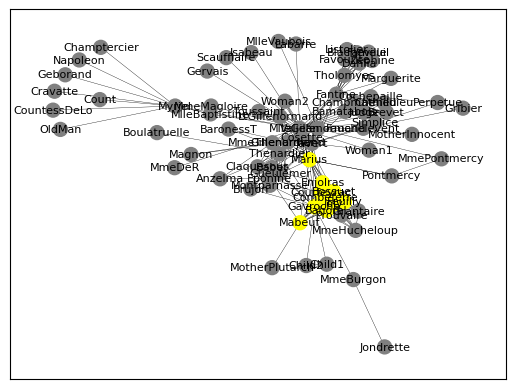

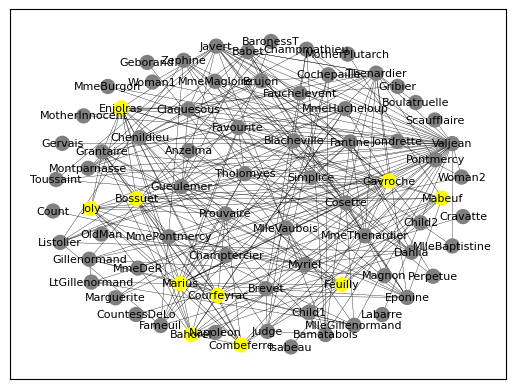

In [24]:
S = gcol.max_independent_set(nx.complement(G), it_limit=10000)
print("In the set of", len(G), "Les Miserables characters, there's a subset of", len(S), "characters who form a clique. These are", S)
nx.draw_networkx(G, 
                 nx.spring_layout(G, seed=1), 
                 node_color=gcol.get_set_colors(G, S), 
                 node_size=100, 
                 font_size=8, 
                 width=0.25)
plt.show()
nx.draw_networkx(G, 
                 nx.arf_layout(G), 
                 node_color=gcol.get_set_colors(G, S), 
                 node_size=100, 
                 font_size=8,
                 width=0.25)
plt.show()